<a href="https://colab.research.google.com/github/Sai-0828/Malaria_Detection/blob/main/Malaria_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upbload Database

In [2]:
!pip install kaggle


In [3]:
username = "saikoppada"
key = "4c34728d026db9b0f4512dea956ccac2"

In [4]:


from google.colab import files
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saikoppada","key":"4c34728d026db9b0f4512dea956ccac2"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria --force

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
100% 673M/675M [00:03<00:00, 213MB/s]
100% 675M/675M [00:03<00:00, 220MB/s]


In [7]:
!unzip cell-images-for-detecting-malaria.zip -d /content/cell-images-for-detecting-malaria

Streaming output truncated to the last 5000 lines.
  inflating: /content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: /content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: /content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: /content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: /content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: /content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: /content/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png

In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import glob

# Initialize lists to store images and labels
allImages = []
allLabels = []

# Define the input shape
input_shape = (124, 124)

# Define the paths
base_path = '/content/cell-images-for-detecting-malaria/cell_images'
ParasitedPath = os.path.join(base_path, 'Parasitized')
UninfectedPath = os.path.join(base_path, 'Uninfected')

# List of paths
paths = [ParasitedPath, UninfectedPath]

for path in paths:
    path2 = path + '/*.png'
    for file in glob.glob(path2):
        print(file)

        # Load the image
        img = cv2.imread(file)

        if img is not None:
            # Resize the image
            resized = cv2.resize(img, input_shape, interpolation=cv2.INTER_AREA)
            allImages.append(resized)

            # Assign labels based on the path
            if path == ParasitedPath:
                allLabels.append(0)
            else:  # Uninfected
                allLabels.append(1)

# Convert lists to numpy arrays for further processing
allImages = np.array(allImages)
allLabels = np.array(allLabels)



Streaming output truncated to the last 5000 lines.
/content/cell-images-for-detecting-malaria/cell_images/Uninfected/C124P85ThinF_IMG_20151002_153825_cell_76.png
/content/cell-images-for-detecting-malaria/cell_images/Uninfected/C226ThinF_IMG_20151112_131622_cell_122.png
/content/cell-images-for-detecting-malaria/cell_images/Uninfected/C159P120ThinF_IMG_20151115_190002_cell_77.png
/content/cell-images-for-detecting-malaria/cell_images/Uninfected/C158P119ThinF_IMG_20151115_181558_cell_9.png
/content/cell-images-for-detecting-malaria/cell_images/Uninfected/C205ThinF_IMG_20151106_151514_cell_135.png
/content/cell-images-for-detecting-malaria/cell_images/Uninfected/C4thin_original_IMG_20150608_165620_cell_130.png
/content/cell-images-for-detecting-malaria/cell_images/Uninfected/C108P69ThinF_IMG_20150924_223834_cell_179.png
/content/cell-images-for-detecting-malaria/cell_images/Uninfected/C52P13thinF_IMG_20150725_124606_cell_74.png
/content/cell-images-for-detecting-malaria/cell_images/Uninf

In [9]:
allImagesNp = np.array(allImages)
print(allImagesNp.shape)

allLabelsNp = np.array(allLabels)
print(allLabelsNp.shape)

allImagesNP = np.array(allImages)
allLabelsNP = np.array(allLabels)

(27558, 124, 124, 3)
(27558,)


In [10]:

print("Total images loaded:", len(allImagesNP))
print("Total labels loaded:", len(allLabelsNP))

# make directory
save_dir = "e:/temp/"
os.makedirs(save_dir, exist_ok=True)

# Save the data
print("Saving the data...")
np.save("e:/temp/Malaria-images.npy", allImagesNP)
np.save("e:/temp/Malaria-labels.npy", allLabelsNP)
print("Finished saving the data.")

Total images loaded: 27558
Total labels loaded: 27558
Saving the data...
Finished saving the data.


Bulding Model

(27558, 124, 124, 3)
(27558,)
0


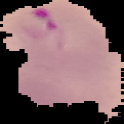

In [11]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#loas the saved data
allImages = np.load("e:/temp/Malaria-images.npy")
allLabels = np.load("e:/temp/Malaria-labels.npy")

print(allImages.shape)
print(allLabels.shape)

input_shape=(124,124,3)
shape=(124,124)

#show the first image
img= allImages[0]
label = allLabels[0]
print(label)



cv2_imshow(img)
cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()

# prepare all the data
# normalize values between 0 and 1

allImagesForModel = allImages/ 255.0







In [12]:
# split train and test

from sklearn.model_selection import train_test_split


print("Split train and test data : ")
X_train, X_test, y_train, y_test = train_test_split(allImagesForModel, allLabels, test_size=0.3, random_state=42)
print("X_train , X_test , _train , y_test ---->>> shapes: ")

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import ModelCheckpoint

model = Sequential()
model.add(Conv2D(input_shape=input_shape, filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=1024, activation='relu'))
model.add(Dense(1,activation='sigmoid'))




Split train and test data : 
X_train , X_test , _train , y_test ---->>> shapes: 
(19290, 124, 124, 3)
(8268, 124, 124, 3)
(19290,)
(8268,)


In [13]:
#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                   

In [14]:
batch = 32
epochs = 10
StepsPerEpoch = np.ceil(len(X_train)/ batch)
validationSteps = np.ceil(len(X_test)/ batch)

best_model_file = "/content/Models/Malaria_Model.h5"

best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train,
                    batch_size=batch,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    validation_steps = validationSteps,
                    steps_per_epoch = StepsPerEpoch,
                    shuffle=True,
                    callbacks=[best_model])

#run code

Epoch 1/10
603/603 [==============================] - ETA: 0s - loss: 0.3107 - accuracy: 0.8766
Epoch 1: val_accuracy improved from -inf to 0.92755, saving model to /content/Models/Malaria_Model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


603/603 [==============================] - 138s 227ms/step - loss: 0.3107 - accuracy: 0.8766 - val_loss: 0.2013 - val_accuracy: 0.9276
Epoch 2/10
603/603 [==============================] - ETA: 0s - loss: 0.1639 - accuracy: 0.9475
Epoch 2: val_accuracy improved from 0.92755 to 0.95428, saving model to /content/Models/Malaria_Model.h5
603/603 [==============================] - 136s 226ms/step - loss: 0.1639 - accuracy: 0.9475 - val_loss: 0.1527 - val_accuracy: 0.9543
Epoch 3/10
603/603 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 0.9544
Epoch 3: val_accuracy did not improve from 0.95428
603/603 [==============================] - 134s 223ms/step - loss: 0.1457 - accuracy: 0.9544 - val_loss: 0.1508 - val_accuracy: 0.9542
Epoch 4/10
603/603 [==============================] - ETA: 0s - loss: 0.1155 - accuracy: 0.9611
Epoch 4: val_accuracy did not improve from 0.95428
603/603 [==============================] - 134s 222ms/step - loss: 0.1155 - accuracy: 0.9611 - val_l

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                   

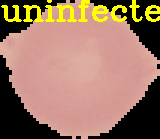

-1

In [15]:
import tensorflow as tf
import os
import cv2

best_model_file = "/content/Models/Malaria_Model.h5"
model = tf.keras.models.load_model(best_model_file)
print(model.summary())

input_shape = (124, 124)
categories = ["infected" , "uninfected"]

def prepareImage(img):
  resized = cv2.resize(img, input_shape, interpolation=cv2.INTER_AREA)
  imgResult = np.expand_dims(resized, axis=0)
  imgResult = imgResult/255.0
  return imgResult

#load image
testImagePath = "/content/testsubject.png"
img = cv2.imread(testImagePath)

#prepare image for model
imgForModel = prepareImage(img)

#predict
result = model.predict(imgForModel, verbose=1)
print(result)


#binary classification
if result > 0.5:
  result = 1
else:
  result = 0

print(result)
text = categories[result]

#show image + prediction

img = cv2.imread(testImagePath)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(img, text, (0,20), font , 1, (0,255,255), 2) #yellow
cv2_imshow(img)
cv2.waitKey(0)


